**Real or Not? NLP with Disaster Tweets**<br>
https://www.kaggle.com/c/nlp-getting-started

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import numba
import os

**1. loading data**

In [2]:
train = pd.read_csv('rawdata/train.csv')
test = pd.read_csv('rawdata/test.csv')




===== training data =====
         id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w...      

欠損値が多すぎて, locationが現時点で使えなさそう.

**TF-IDF and Logistic Regression**

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer

features = "text"
target = "target"

# prepare vectorizer
vectorizer = TfidfVectorizer() #text => vector
vectorizer.fit(train[features])

X_train = vectorizer.transform(train[features]
                              )
X_train = X_train.toarray()
Y_train = train[target]

# train model
model = LogisticRegression()
model.fit(X_train,Y_train)

# predict
data = pd.concat([train,test],axis=0,sort=True)
X = vectorizer.transform(data[features]).toarray()
pred = model.predict(X)

# concat to submit file
data["target"] = pred

# load submission file
submission = pd.read_csv(os.path.join("rawdata","sample_submission.csv"))

# my submission file
data = data.set_index(data["id"])
data = data.sort_index()

mysub = data.iloc[submission["id"]]
mysub[["id","target"]].to_csv(os.path.join("rawdata","TF-IDFandLogisticReg.csv"),index=False)

C:\Users\organ\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**TF-IDF and XGboost Classifier**

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer

features = "text"
target = "target"

# prepare vectorizer
vectorizer = TfidfVectorizer() #text => vector
vectorizer.fit(train[features])

X_train = vectorizer.transform(train[features])
X_train = X_train.toarray()
Y_train = train[target]

# train model
model = xgb.XGBClassifier(tree_method='gpu_hist', gpu_id=0,objective="binary:logistic")
print("training")
model.fit(X_train,Y_train)
print("finish")

# predict
data = pd.concat([train,test],axis=0,sort=True)
X = vectorizer.transform(data[features]).toarray()
pred = model.predict(X)

# concat to submit file
data["target"] = pred

# load submission file
submission = pd.read_csv(os.path.join("rawdata","sample_submission.csv"))

# my submission file
data = data.set_index(data["id"])
data = data.sort_index()

mysub = data.iloc[submission["id"]]
mysub[["id","target"]].to_csv(os.path.join("rawdata","TF-IDFandXGBClf.csv"),index=False)

training
finish


**4. Word Vector(Word2Vec)** 

In [19]:
import os
import pandas as pd

features = train.columns[["fig" in s for s in train.columns]]

train = pd.read_csv(os.path.join("data","new_train.csv"))
trainX = train[features].groupby(train["id"]).mean()

plt.imshow(trainX,aspect=len(features)/len(trainX))
plt.show()


test = pd.read_csv(os.path.join("data","new_test.csv"))
testX = test[features].groupby(test["id"]).mean()

plt.imshow(testX,aspect=len(features)/len(testX))
plt.show()

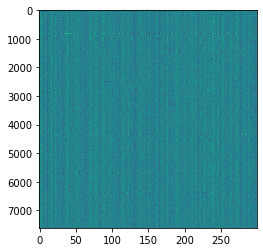

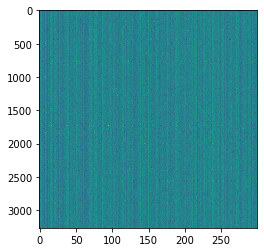

In [21]:
features = train.columns[["fig" in s for s in train.columns]]         



In [15]:
import pandas as pd
import xgboost as xgb
import os

train = pd.read_csv("doc2vec_train.csv",index_col=0)
features = ["fig"+str(i) for i in range(300)]
X_train = train[features]
Y_train = train["target"]

print(X_train)
print(Y_train)

#train model
model = xgb.XGBClassifier(tree_method='gpu_hist', gpu_id=0,objective="binary:logistic")
print("training")
model.fit(X_train,Y_train)
print("finish")

test = pd.read_csv("doc2vec_test.csv",index_col=0)
X_test = test[features]

data = pd.concat([X_train,X_test])

pred = model.predict(data)

data["target"] = pred

# load submission file
submission = pd.read_csv(os.path.join("rawdata","sample_submission.csv"))
print(submission)

# my submission file
data = data.sort_index()
data["id"] = data.index

mysub = data.iloc[submission["id"]]
mysub["id"] = mysub["id"].astype("int64")
mysub[["id","target"]].to_csv(os.path.join("rawdata","W2VandXGBClf.csv"),index=False)

             fig0      fig1      fig2      fig3      fig4      fig5      fig6  \
id                                                                              
1.0      0.090543  0.071672  0.116595  0.139449 -0.095981  0.009183  0.134100   
4.0      0.085254 -0.011194  0.002753  0.136572  0.177734 -0.000635  0.006836   
5.0     -0.007711 -0.006226  0.099745  0.016076 -0.064762 -0.031399  0.006936   
6.0      0.083781 -0.054871  0.073751  0.184224 -0.012472 -0.099983 -0.041585   
7.0      0.041025  0.051597 -0.009512  0.049316 -0.031137 -0.004089  0.016963   
...           ...       ...       ...       ...       ...       ...       ...   
10869.0  0.055189  0.005992  0.006073  0.024550  0.017048 -0.141561  0.014442   
10870.0  0.095583  0.051217  0.007956  0.081735 -0.008174 -0.064305  0.023516   
10871.0  0.018555 -0.068848  0.029816  0.254150  0.038147 -0.087402 -0.032715   
10872.0  0.090593  0.052124  0.054425 -0.097375 -0.077674 -0.032358  0.070003   
10873.0  0.092749 -0.068087 

C:\Users\organ\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [82]:
model["truth"]

array([ 2.87109375e-01, -1.45507812e-01,  1.87500000e-01, -1.14746094e-01,
       -7.95898438e-02,  3.30078125e-01,  2.59765625e-01,  1.83593750e-01,
        3.20312500e-01,  1.54296875e-01,  8.15429688e-02, -2.46582031e-02,
       -8.00781250e-02,  2.75390625e-01, -1.45507812e-01,  5.42968750e-01,
        1.78710938e-01, -1.60156250e-01,  8.97216797e-03, -1.20605469e-01,
        3.29589844e-03,  1.31835938e-01,  3.75000000e-01,  7.37304688e-02,
        1.79687500e-01,  1.28906250e-01, -1.05957031e-01, -6.34765625e-02,
        1.16699219e-01, -5.79833984e-03, -1.65039062e-01,  1.75781250e-01,
       -7.17773438e-02,  9.39941406e-03, -7.56835938e-02,  9.86328125e-02,
        1.87500000e-01,  1.11328125e-01,  1.70898438e-01,  5.02929688e-02,
        1.69677734e-02, -4.63867188e-02, -2.39257812e-01, -4.78515625e-02,
       -7.17773438e-02,  1.95312500e-01, -1.30859375e-01,  1.20849609e-02,
       -1.30859375e-01, -8.83789062e-02,  1.36718750e-01,  9.96093750e-02,
        4.88281250e-02, -